In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df = pd.get_dummies(df, drop_first=True)
print("Final shape:", df.shape)

Final shape: (1470, 45)


In [4]:
print(df.isnull().sum())

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rar

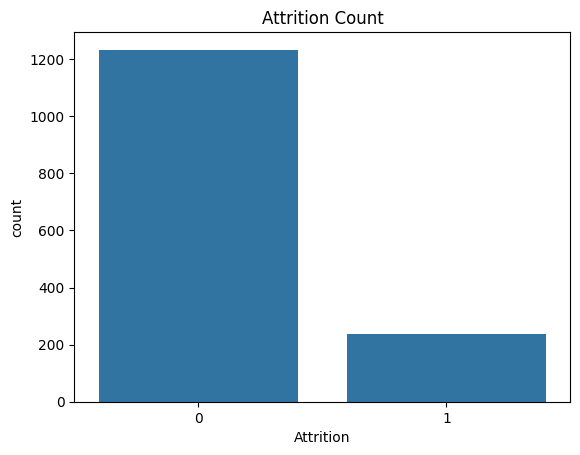

In [5]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

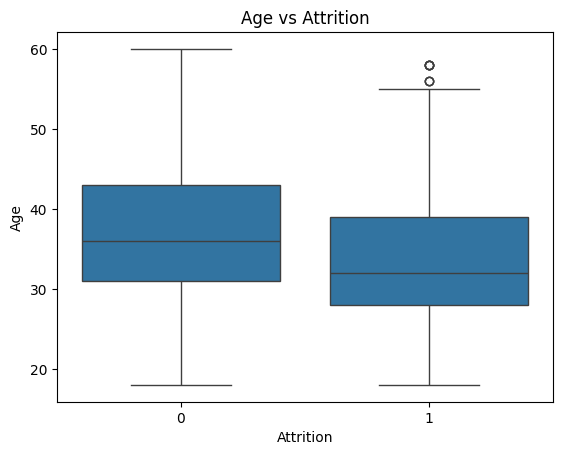

In [6]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()

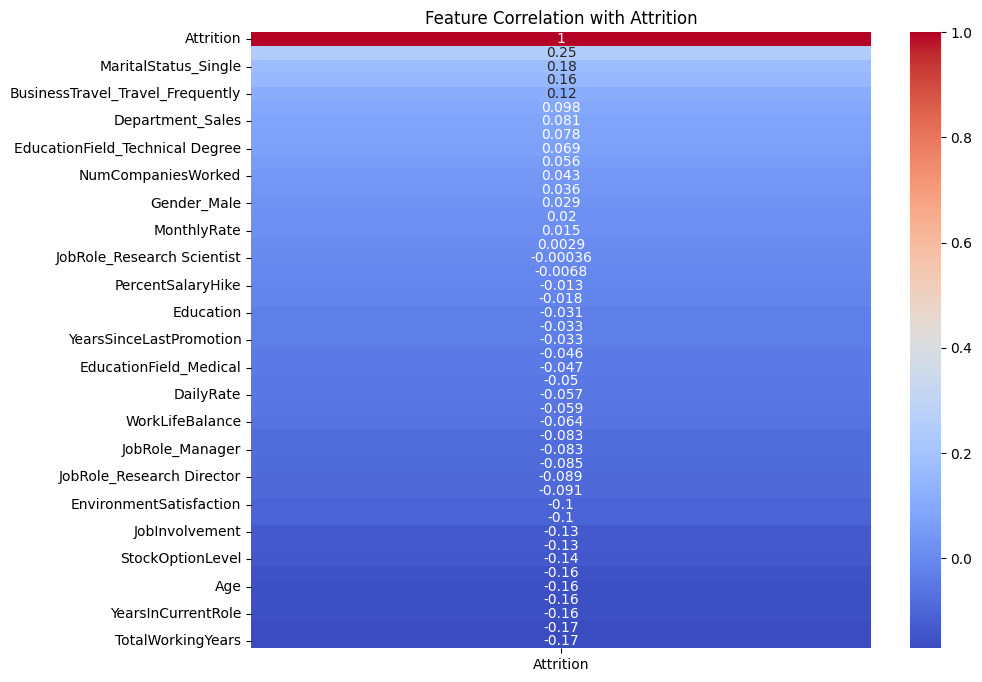

In [7]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Attrition")
plt.show()

In [8]:
# Feature-target split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection (top 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


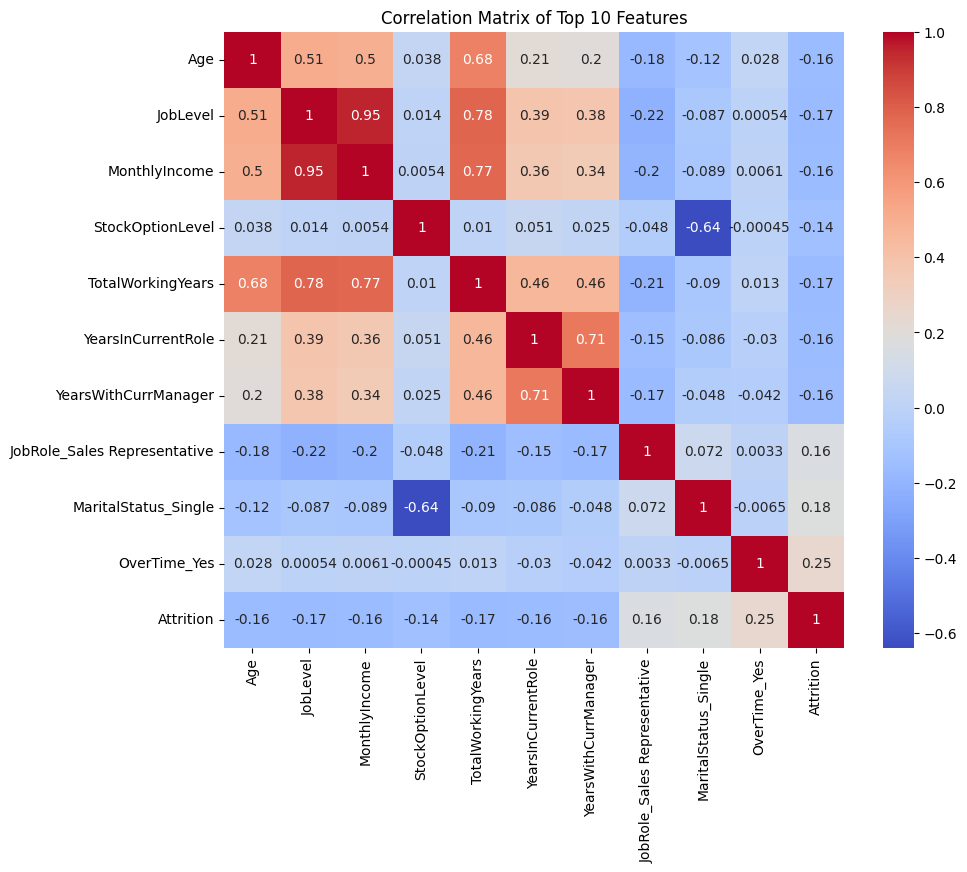

In [11]:
# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get column names of selected features
selected_features = X.columns[selected_indices]

# Create correlation matrix of selected features + target
corr_matrix = df[selected_features.tolist() + ['Attrition']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Top 10 Features")
plt.show()


In [12]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

log_acc = accuracy_score(y_test, log_pred)
log_cv = cross_val_score(log_model, X_train_scaled, y_train, cv=5).mean()

print("Logistic Regression")
print("Accuracy Score:", log_acc)
print("Cross-Validation Score:", log_cv)


Logistic Regression
Accuracy Score: 0.8605442176870748
Cross-Validation Score: 0.8443815362423368


In [14]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, svm_pred)
svm_cv = cross_val_score(svm_model, X_train_scaled, y_train, cv=5).mean()

print("SVM")
print("Accuracy Score:", svm_acc)
print("Cross-Validation Score:", svm_cv)


SVM
Accuracy Score: 0.8673469387755102
Cross-Validation Score: 0.8452398124774613


In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_cv = cross_val_score(rf_model, X, y, cv=5).mean()

print("Random Forest")
print("Accuracy Score:", rf_acc)
print("Cross-Validation Score:", rf_cv)


Random Forest
Accuracy Score: 0.8775510204081632
Cross-Validation Score: 0.8578231292517007


In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_cv = cross_val_score(dt_model, X, y, cv=5).mean()

print("Decision Tree")
print("Accuracy Score:", dt_acc)
print("Cross-Validation Score:", dt_cv)


Decision Tree
Accuracy Score: 0.7585034013605442
Cross-Validation Score: 0.7857142857142858


##  BI Layer: Interactive Dashboard with Streamlit

This section exports prediction results and creates a dashboard to visualize Employee Attrition insights interactively.

In [17]:
# Assuming 'df' is your main DataFrame and 'model' is your final trained classifier
df['Attrition_Prediction'] = rf_model.predict(X)
df['Attrition_Prob'] = rf_model.predict_proba(X)[:, 1] if hasattr(rf_model, 'predict_proba') else 0.5  # fallback

# Save this dataset for BI tools or dashboard apps
df.to_csv("attrition_predictions.csv", index=False)
print(" attrition_predictions.csv exported successfully.")

 attrition_predictions.csv exported successfully.
